In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [10]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


4


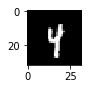

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [12]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [13]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [49]:
import os
session = tf.Session()
saver = tf.train.Saver()
save_dir = 'checkpoints_lenetMinst/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'best_validation')
#session.run(tf.global_variables_initializer())
init = tf.global_variables_initializer()
session.run(init)
try:
    print("Trying to restore last checkpoint ...")

    # Use TensorFlow to find the latest checkpoint - if any.
    last_chk_path = tf.train.latest_checkpoint(checkpoint_dir=save_dir)

    # Try and load the data in the checkpoint.
    saver.restore(session, save_path=last_chk_path)

    # If we get to this point, the checkpoint was successfully loaded.
    print("Restored checkpoint from:", last_chk_path)
except:
    # If the above failed for some reason, simply
    # initialize all the variables for the TensorFlow graph.
    print("Failed to restore checkpoint. Initializing variables instead.")
    session.run(tf.global_variables_initializer())



Trying to restore last checkpoint ...
Failed to restore checkpoint. Initializing variables instead.


In [185]:
sigma = 0.1
conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = 0, stddev = 0.1))
conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = 0, stddev = 0.1))
fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = 0, stddev = sigma))
fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = 0, stddev = sigma))
fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = 0 , stddev = sigma))
session.run(tf.global_variables_initializer())


## store the original weights

In [61]:
wConvOrig1 = session.run(conv1_w)
wConvOrig2 = session.run(conv2_w)
wFcOrig1 = session.run(fc1_w)
wFcOrig2 = session.run(fc2_w)
wFcOrig3 = session.run(fc3_w)

In [63]:
wOrigConv = [wConvOrig1, wConvOrig2 ]
wOrigFc = [wFcOrig1, wFcOrig2, wFcOrig3]

In [46]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 120,
        'layer_f1' : 84
    }

    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits, conv1, conv2, fc1, fc2, conv2_w, fc1_w, fc2_w, fc3_w

In [182]:
a = tf.placeholder(tf.float32, (100,32,32,1))
x_image = tf.reshape(a, [-1, 32, 32, 1])

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

In [183]:
rate = 0.001

logits, conv1, conv2, fc1, fc2, conv2_w, fc1_w, fc2_w, fc3_w = LeNet(x_image)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


print(conv1)

Tensor("Relu_52:0", shape=(100, 28, 28, 6), dtype=float32)


## weightsConvMat and weightsFcMat

In [186]:
weightsConvMat = [conv1_w, conv2_w]
weightsFcMat = [fc1_w, fc2_w, fc3_w]


wConv1 = session.run(conv1_w)
wConv2 = session.run(conv2_w)
wFc1 = session.run(fc1_w)
wFc2 = session.run(fc2_w)
wFc3 = session.run(fc3_w)

wConv = [wConv1, wConv2]
wFc = [wFc1, wFc2, wFc3]


In [126]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        print(accuracy)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.966

EPOCH 2 ...
Validation Accuracy = 0.979

EPOCH 3 ...
Validation Accuracy = 0.984

EPOCH 4 ...
Validation Accuracy = 0.986

EPOCH 5 ...
Validation Accuracy = 0.983

EPOCH 6 ...
Validation Accuracy = 0.986

EPOCH 7 ...
Validation Accuracy = 0.987

EPOCH 8 ...
Validation Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.989

EPOCH 10 ...
Validation Accuracy = 0.986

Model saved


In [127]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

FailedPreconditionError: Attempting to use uninitialized value Variable_102
	 [[Node: Variable_102/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_102"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_102)]]

Caused by op 'Variable_102/read', defined at:
  File "/Users/yaminigaur/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/yaminigaur/anaconda3/lib/python3.7/asyncio/base_events.py", line 523, in run_forever
    self._run_once()
  File "/Users/yaminigaur/anaconda3/lib/python3.7/asyncio/base_events.py", line 1758, in _run_once
    handle._run()
  File "/Users/yaminigaur/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-59-15f267902d80>", line 2, in <module>
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = 0, stddev = 0.1))
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/yaminigaur/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_102
	 [[Node: Variable_102/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_102"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_102)]]


## create a list to hold the difference between the two filters

In [187]:
wDiffConv = []+ wOrigConv
wDiffFc = []+ wOrigFc


## create alternative filters

In [69]:
def roundToZeroFilter(wtListConv,wtListFc):
    num = len(wtListConv)
    
    for wtMat in wtListConv:
        shape = wtMat.shape
        xlen = shape[0]
        ylen = shape[1]
        numChnls = shape[2]
        numFilters = shape[3]

        for c in range(0,numChnls):
            for i in range(0,numFilters):
                for j in range(0,xlen):
                    for k in range(0,ylen):
                        if wtMat[j,k,c,i] < 0:
                            wtMat[j,k,c,i] = 0#float('%.5f'%(w[j,k,0,i]))
                            
    for wtMat in wtListFc:
        shape = wtMat.shape
        xlen = shape[0]
        ylen = shape[1]
        
        for i in range(0,xlen):
            j=0
            while j<ylen:
                if wtMat[i,j] < 0:
                    wtMat[i,j] = 0
                j=j+1;


In [188]:
roundToZeroFilter(wConv, wFc)

In [189]:
def assignFilters(wConv,wFc):
    for wIdx in range(0,len(weightsConvMat)):
        assign_op = weightsConvMat[wIdx].assign(wConv[wIdx])
        session.run(assign_op)
        
    for wIdx in range(0,len(weightsFcMat)):
        assign_op = weightsFcMat[wIdx].assign(wFc[wIdx])
        session.run(assign_op)

In [190]:
assignFilters(wConv, wFc)


In [191]:
def calculateDiff(wConv, wFc, wOrigConv, wOrigFc):
    for i in range(len(wConv)):
        wDiffConv[i] = abs(wOrigConv[i] - wConv[i])
        
    
            
        
    for i in range(len(wFc)):
        wDiffFc[i] = abs(wOrigFc[i] - wFc[i])
    
    
    

In [192]:
calculateDiff(wConv, wFc, wOrigConv, wOrigFc)
wDiffConv


[array([[[[0.11901221, 0.17649537, 0.14901486, 0.06125855, 0.16325521,
           0.01867301]],
 
         [[0.1019667 , 0.        , 0.13017558, 0.06762074, 0.        ,
           0.21091   ]],
 
         [[0.13760117, 0.21680355, 0.        , 0.        , 0.10063673,
           0.        ]],
 
         [[0.02488051, 0.        , 0.08596452, 0.0277138 , 0.14184996,
           0.11102046]],
 
         [[0.04878148, 0.        , 0.05983479, 0.02318437, 0.19995129,
           0.15812337]]],
 
 
        [[[0.03432947, 0.05504634, 0.07050648, 0.1523194 , 0.00264934,
           0.        ]],
 
         [[0.24724796, 0.07615113, 0.0798961 , 0.05767376, 0.15144458,
           0.09254966]],
 
         [[0.        , 0.0700943 , 0.02569157, 0.        , 0.08150136,
           0.        ]],
 
         [[0.        , 0.12986498, 0.01112988, 0.03329432, 0.14448228,
           0.        ]],
 
         [[0.27490246, 0.03488301, 0.1254354 , 0.13989896, 0.09671538,
           0.04375383]]],
 
 
        [[[0.0

In [205]:

#def calculateConvME()



In [224]:
#numImg = 5

In [225]:
def calculateConvMEIntermediate(valuesMat):
    for value in valuesMat:
        average, averageSorted = calculateConvME(value)

In [226]:
def calculateConvME(valuesMat):
    shape = valuesMat.shape
    valMat = valuesMat
    numFilters = shape[3]
    print("THE SIZE OF THE FILTERS IS ")
    print(valuesMat.shape)
    means = np.zeros(numFilters)
    meanSum = np.zeros(numFilters)
    
    for nImg in range(0,numImg):
        meanSum = meanSum + means
        for i in range(0,numFilters):
            result = valMat[nImg,:,:,i]
            result_sum = np.sum(result)
            means[i] = result_sum

    average = [x / numImg for x in meanSum]
    averageSorted = np.sort(average)
    return average, averageSorted

In [241]:
def calculateFCME(valuesMat):
    shape = valuesMat.shape
    valMat = valuesMat
    numFilters = shape[1]
    means = np.zeros(numFilters)
    meanSum = np.zeros(numFilters)
    
    for nImg in range(0, numImg):
        meanSum = meanSum + means
        for i in range(0, numFilters):
            result = valMat[nImg, i]
            result_sum = np.sum(result)
            means[i] = result_sum
            
    average = [x/numImg for x in meanSum]
    averageSorted = np.sort(average)
    return average, averageSorted

In [229]:

##calculateConvME(conv1)

In [230]:
plc = tf.placeholder(tf.float32, shape=(100,32,32,1))
#y = tf.matmul(plc, plc)
x_image = tf.reshape(x, [-1, 32, 32, 1])
y = X_test[0:100]
print(y.shape)

rand_array = np.random.rand(100, 32,32,1)
#print(session.run(y, feed_dict={plc: x_image}))  # Will succeed.

(100, 32, 32, 1)


In [155]:
conv1

<tf.Tensor 'Relu_36:0' shape=(?, 28, 28, 6) dtype=float32>

In [231]:
def loadValues(numImg):
    images = X_test[0:numImg]
    #print(images.shape)
    feed_dict = {a: images}
    values_conv1 = session.run(conv1, feed_dict=feed_dict)
    values_conv2 = session.run(conv2, feed_dict = feed_dict)
    values_fc1 = session.run(fc1, feed_dict = feed_dict)
    values_fc2 = session.run(fc2, feed_dict = feed_dict)
    values_fc3 = session.run(logits, feed_dict = feed_dict)
    
    valuesConvMat = [values_conv1, values_conv2]
    valuesFcMat = [values_fc1, values_fc2, values_fc3]
    
    return valuesConvMat, valuesFcMat, numImg

### the reason why some of these values can be negative despite the abs difference is that the filter is getting convolved with the input
### image that may have negative individual values.

### at this step, we need to ensure that all our ME values are positive

In [255]:
assignFilters(wConv,wFc)
assign_op = weightsFcMat[0].assign(wDiffFc[0])
session.run(assign_op)
assign_op = weightsConvMat[0].assign(wDiffConv[0])
session.run(assign_op)

###### LAYER 1 ######
valuesConvMat, valuesFcMat, numImg = loadValues(100)
MEConv1,MEConv1Sorted = calculateConvME(valuesConvMat[0])
MEFullyConnected1, MEFullyConnected1Sorted = calculateFCME(valuesFcMat[0])


assignFilters(wConv,wFc)
assign_op = weightsFcMat[1].assign(wDiffFc[1])
session.run(assign_op)
assign_op = weightsConvMat[1].assign(wDiffConv[1])
session.run(assign_op)

###### LAYER 2 ######
valuesConvMat,valuesFcMat,numImg = loadValues(100)
MEConv2,MEConv2Sorted = calculateConvME(valuesConvMat[1])
MEFullyConnected2, MEFullyConnected2Sorted = calculateFCME(valuesFcMat[1])

assign_op = weightsFcMat[2].assign(wDiffFc[2])
session.run(assign_op)
valuesConvMat,valuesFcMat,numImg = loadValues(100)
MEFullyConnected3, MEFullyConnected3Sorted = calculateFCME(valuesFcMat[2])


#MEConvMat = [MEConv1Sorted, MEConv2Sorted]
#print(MEConv1Sorted)
#MEFullyConnectedMat = [MEFullyConnected1Sorted, MEFullyConnected2Sorted, ]
print("end of function")

THE SIZE OF THE FILTERS IS 
(100, 28, 28, 6)
THE SIZE OF THE FILTERS IS 
(100, 10, 10, 16)
end of function


In [257]:
MEConv2

[4.432142291069031,
 3.312230508327484,
 0.6281358251348138,
 12.49908395767212,
 2.0987892973423006,
 0.07514176176395267,
 3.0432707297801973,
 4.202534377574921,
 12.635461831092835,
 11.883553409576416,
 21.06974052429199,
 5.856409554481506,
 5.026970236301422,
 12.018123908042908,
 0.5041962166130542,
 5.630631861686706]

In [263]:
def plotConvME(ME1, ME2):
    import numpy as np
    x1 = np.arange(len(ME1))
    y1 = np.arange(len(ME2))
    plt.bar(x1, ME1, color = 'b', align = 'center')
    plt.bar(y1+7, ME2,color = 'g', align = 'center')

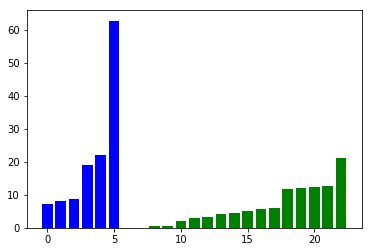

In [265]:
plotConvME(MEConv1Sorted, MEConv2Sorted)